**Libraries import**

In [1]:
#  libaries imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Do not change this option; This allows the CodeGrade auto grading to function correctly
pd.set_option('display.max_columns', None)

**Import the excel dataset**

In [2]:
# Import data from excel

# setup the filename and object
filename = 'data_science_books.xlsx'
lsx = pd.ExcelFile(filename)

# import each excel sheet from excel woorkbook
book_meta_data = pd.read_excel(lsx, 'book_meta_data')
book_ratings = pd.read_excel(lsx, 'book_ratings')
book_prices = pd.read_excel(lsx, 'book_prices')

**Data merging**

Assuming that we want to analyze the data for only books that have ratings. Also, we want to include the prices for the respective books as well, but we are fine if a book does not have a price

In [3]:
# merge data to have books with ratings
df_merge = book_meta_data.merge(book_ratings, on = 'ISBN')

# merge data to include price for respective price
df_merge1 = df_merge.merge(book_prices, on = 'ISBN', how='outer')

**Get to know the merged dataset**

In [4]:
# output the first few rows to have an overview of the data
df_merge1.head(3)

,book_title,book_author,pages,dimensions,weight,language,publisher,ISBN,link,complete_link,avg_reviews,n_reviews,star5,star4,star3,star2,star1,price
0,Becoming a Data Head: How to Think Speak and U...,"[Alex J. Gutman,Jordan Goldmeier]",272.0,6 x 0.62 x 9 inches,12.5 ounces,1.0,Wiley; 1st edition (April 23 2021),978-1119741749,/Becoming-Data-Head-Understand-Statistics/dp/1...,https://www.amazon.com/Becoming-Data-Head-Unde...,4.6,184.0,0.74,0.18,0.05,0.02,0.01,24.49
1,Ace the Data Science Interview: 201 Real Inter...,"[Nick Singh,Kevin Huo]",301.0,7 x 0.68 x 10 inches,1.28 pounds,1.0,Ace the Data Science Interview (August 16 2021),978-0578973838,/Ace-Data-Science-Interview-Questions/dp/05789...,https://www.amazon.com/Ace-Data-Science-Interv...,4.5,599.0,0.77,0.10,0.06,0.03,0.04,26.00
2,Fundamentals of Data Engineering: Plan and Bui...,"[Joe Reis,Matt Housley]",446.0,7 x 1 x 9.25 inches,1.57 pounds,1.0,OReilly Media; 1st edition (July 26 2022),978-1098108304,/Fundamentals-Data-Engineering-Robust-Systems/...,https://www.amazon.com/Fundamentals-Data-Engin...,5.0,33.0,0.96,0.04,0.00,0.00,0.00,50.76


In [5]:
df_merge1.describe()

,pages,language,avg_reviews,n_reviews,star5,star4,star3,star2,star1,price
count,813.000000,822.000000,822.000000,822.000000,822.000000,822.000000,822.000000,822.000000,822.000000,943.000000
mean,428.195572,1.008516,4.443187,158.465937,0.719404,0.161898,0.066873,0.030499,0.021290,52.122566
std,207.752902,0.125546,0.400421,532.810296,0.149212,0.106345,0.061974,0.039551,0.032862,36.605463
min,48.000000,1.000000,1.000000,1.000000,0.110000,0.000000,0.000000,0.000000,0.000000,4.730000
25%,280.000000,1.000000,4.300000,10.000000,0.620000,0.100000,0.000000,0.000000,0.000000,31.855000
50%,392.000000,1.000000,4.500000,34.000000,0.720000,0.150000,0.060000,0.020000,0.000000,44.000000
75%,544.000000,1.000000,4.700000,110.000000,0.800000,0.200000,0.090000,0.040000,0.040000,56.840000
max,1728.000000,3.000000,5.000000,7563.000000,1.000000,0.630000,0.400000,0.250000,0.230000,279.950000


From the above, it is observed that language is store as numeric. A review of the meta data indicates that 1 = English, 2 = Spanish, 3 = Others. Make the language to string data type and replace with respective language

In [6]:
#df_merge1['language'] = df_merge1['language'].astype(str)
df_merge1['language'] = df_merge1['language'].replace([1, 2, 3, 'Nan'],['English','Spanish','Others', np.nan]).astype(str)

In [7]:
# Output some info about the data
df_merge1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 945 entries, 0 to 944
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   book_title     822 non-null    object 
 1   book_author    708 non-null    object 
 2   pages          813 non-null    float64
 3   dimensions     818 non-null    object 
 4   weight         819 non-null    object 
 5   language       945 non-null    object 
 6   publisher      818 non-null    object 
 7   ISBN           945 non-null    object 
 8   link           822 non-null    object 
 9   complete_link  822 non-null    object 
 10  avg_reviews    822 non-null    float64
 11  n_reviews      822 non-null    float64
 12  star5          822 non-null    float64
 13  star4          822 non-null    float64
 14  star3          822 non-null    float64
 15  star2          822 non-null    float64
 16  star1          822 non-null    float64
 17  price          943 non-null    float64
dtypes: float64

From the above, it is observed that the dataset consists of about 945 observations with 18 variables (8 of which are qualitatives and 10 are quantitatives). Also, the inequality in the number of counts/enteries indicates the dataset contains null values, which needs to be deleted or replaced.

In [8]:
df_merge1.dropna(inplace=True)

In [9]:
df_merge1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 698 entries, 0 to 821
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   book_title     698 non-null    object 
 1   book_author    698 non-null    object 
 2   pages          698 non-null    float64
 3   dimensions     698 non-null    object 
 4   weight         698 non-null    object 
 5   language       698 non-null    object 
 6   publisher      698 non-null    object 
 7   ISBN           698 non-null    object 
 8   link           698 non-null    object 
 9   complete_link  698 non-null    object 
 10  avg_reviews    698 non-null    float64
 11  n_reviews      698 non-null    float64
 12  star5          698 non-null    float64
 13  star4          698 non-null    float64
 14  star3          698 non-null    float64
 15  star2          698 non-null    float64
 16  star1          698 non-null    float64
 17  price          698 non-null    float64
dtypes: float64

**Q1. Which of the data book (title) recieved max reviews?**

In [10]:
max_review = df_merge1['n_reviews'].max()
max_data_bkreview = df_merge1[df_merge1['n_reviews'] == max_review]['book_title'].iloc[0]
print('Book with highest numbers of review: \n\n', max_data_bkreview)

Book with highest numbers of review: 

 Cracking the Coding Interview: 189 Programming Questions and Solutions


**We can also view the top 15 most review books in a bar chat**

In [11]:
# filter the top 15 most review books
data1 = df_merge1.sort_values('n_reviews', ascending = False)[:15]

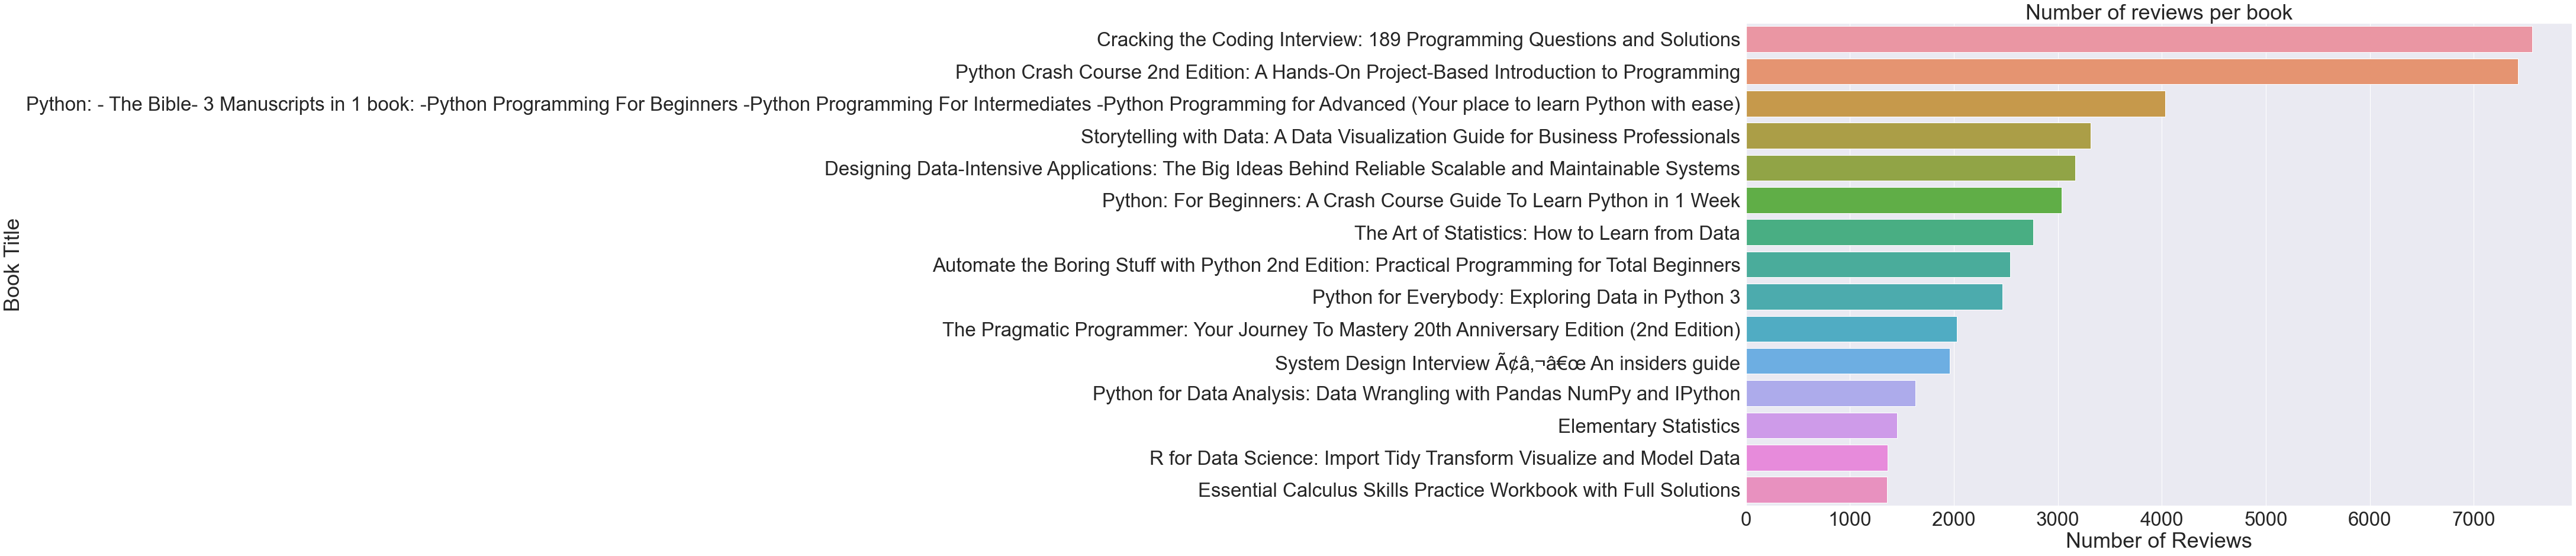

In [12]:
sns.set(rc={'figure.figsize':(25,15)}, font_scale = 3)
chart = sns.barplot(x='n_reviews',y='book_title', data = data1)
#sns.set(rc={'figure.figsize':(15,10)})
chart.set_title('Number of reviews per book')

chart.set_xlabel('Number of Reviews')
chart.set_ylabel('Book Title')

plt.show()

**Q2. Which book has most percentage of 5 stars?**

In [13]:
five_stars_review = df_merge1['star5'].max()
five_stars_review = df_merge1[df_merge1['star5'] == five_stars_review]['book_title'].iloc[0]
print('Book with highest numbers of 5 stars: \n\n', five_stars_review)

Book with highest numbers of 5 stars: 

 Effective Data Science Infrastructure: How to make data scientists productive


**We need to further explore the data before one can conclude this is best book for data scientists. Check the number of reviews as well as the breakdown of the stars given by the reviewers**

In [14]:
df_merge1[df_merge1['book_title'] == five_stars_review][['n_reviews','star5','star4','star3','star2','star1']]

,n_reviews,star5,star4,star3,star2,star1
20,5.0,1.0,0.0,0.0,0.0,0.0


In [15]:
df_merge1[df_merge1['book_title'] == five_stars_review]

,book_title,book_author,pages,dimensions,weight,language,publisher,ISBN,link,complete_link,avg_reviews,n_reviews,star5,star4,star3,star2,star1,price
20,Effective Data Science Infrastructure: How to ...,[Ville Tuulos],352.0,7.38 x 0.8 x 9.25 inches,1.15 pounds,English,Manning (August 16 2022),978-1617299193,/Effective-Data-Science-Infrastructure-scienti...,https://www.amazon.com/Effective-Data-Science-...,5.0,5.0,1.0,0.0,0.0,0.0,0.0,49.99


The above shows that there were only 5 reviewers, with only one percent of which coming from five star rating. The five number of reviews is too small to recommend as one of the most used books. Therefore, let have an insight into the composition of ratings for the book with most review. 

In [16]:
# output the number of reviews togther with their ratings
df_merge1[df_merge1['n_reviews'] == max_review][['n_reviews','star5','star4','star3','star2','star1']]

,n_reviews,star5,star4,star3,star2,star1
113,7563.0,0.81,0.12,0.04,0.01,0.02


From the above, the book with highest number of reviews (7563) has 81% of five star rating, which can be considered good for a book, thus one can recommend this for potential users.

**Insight into the ratings of top 20 most review books - bar chats**

In [17]:
# filter the top 50 most review books
data2 = df_merge1.sort_values('n_reviews', ascending = False)[:50][['book_title','star5','star4','star3','star2','star1']]

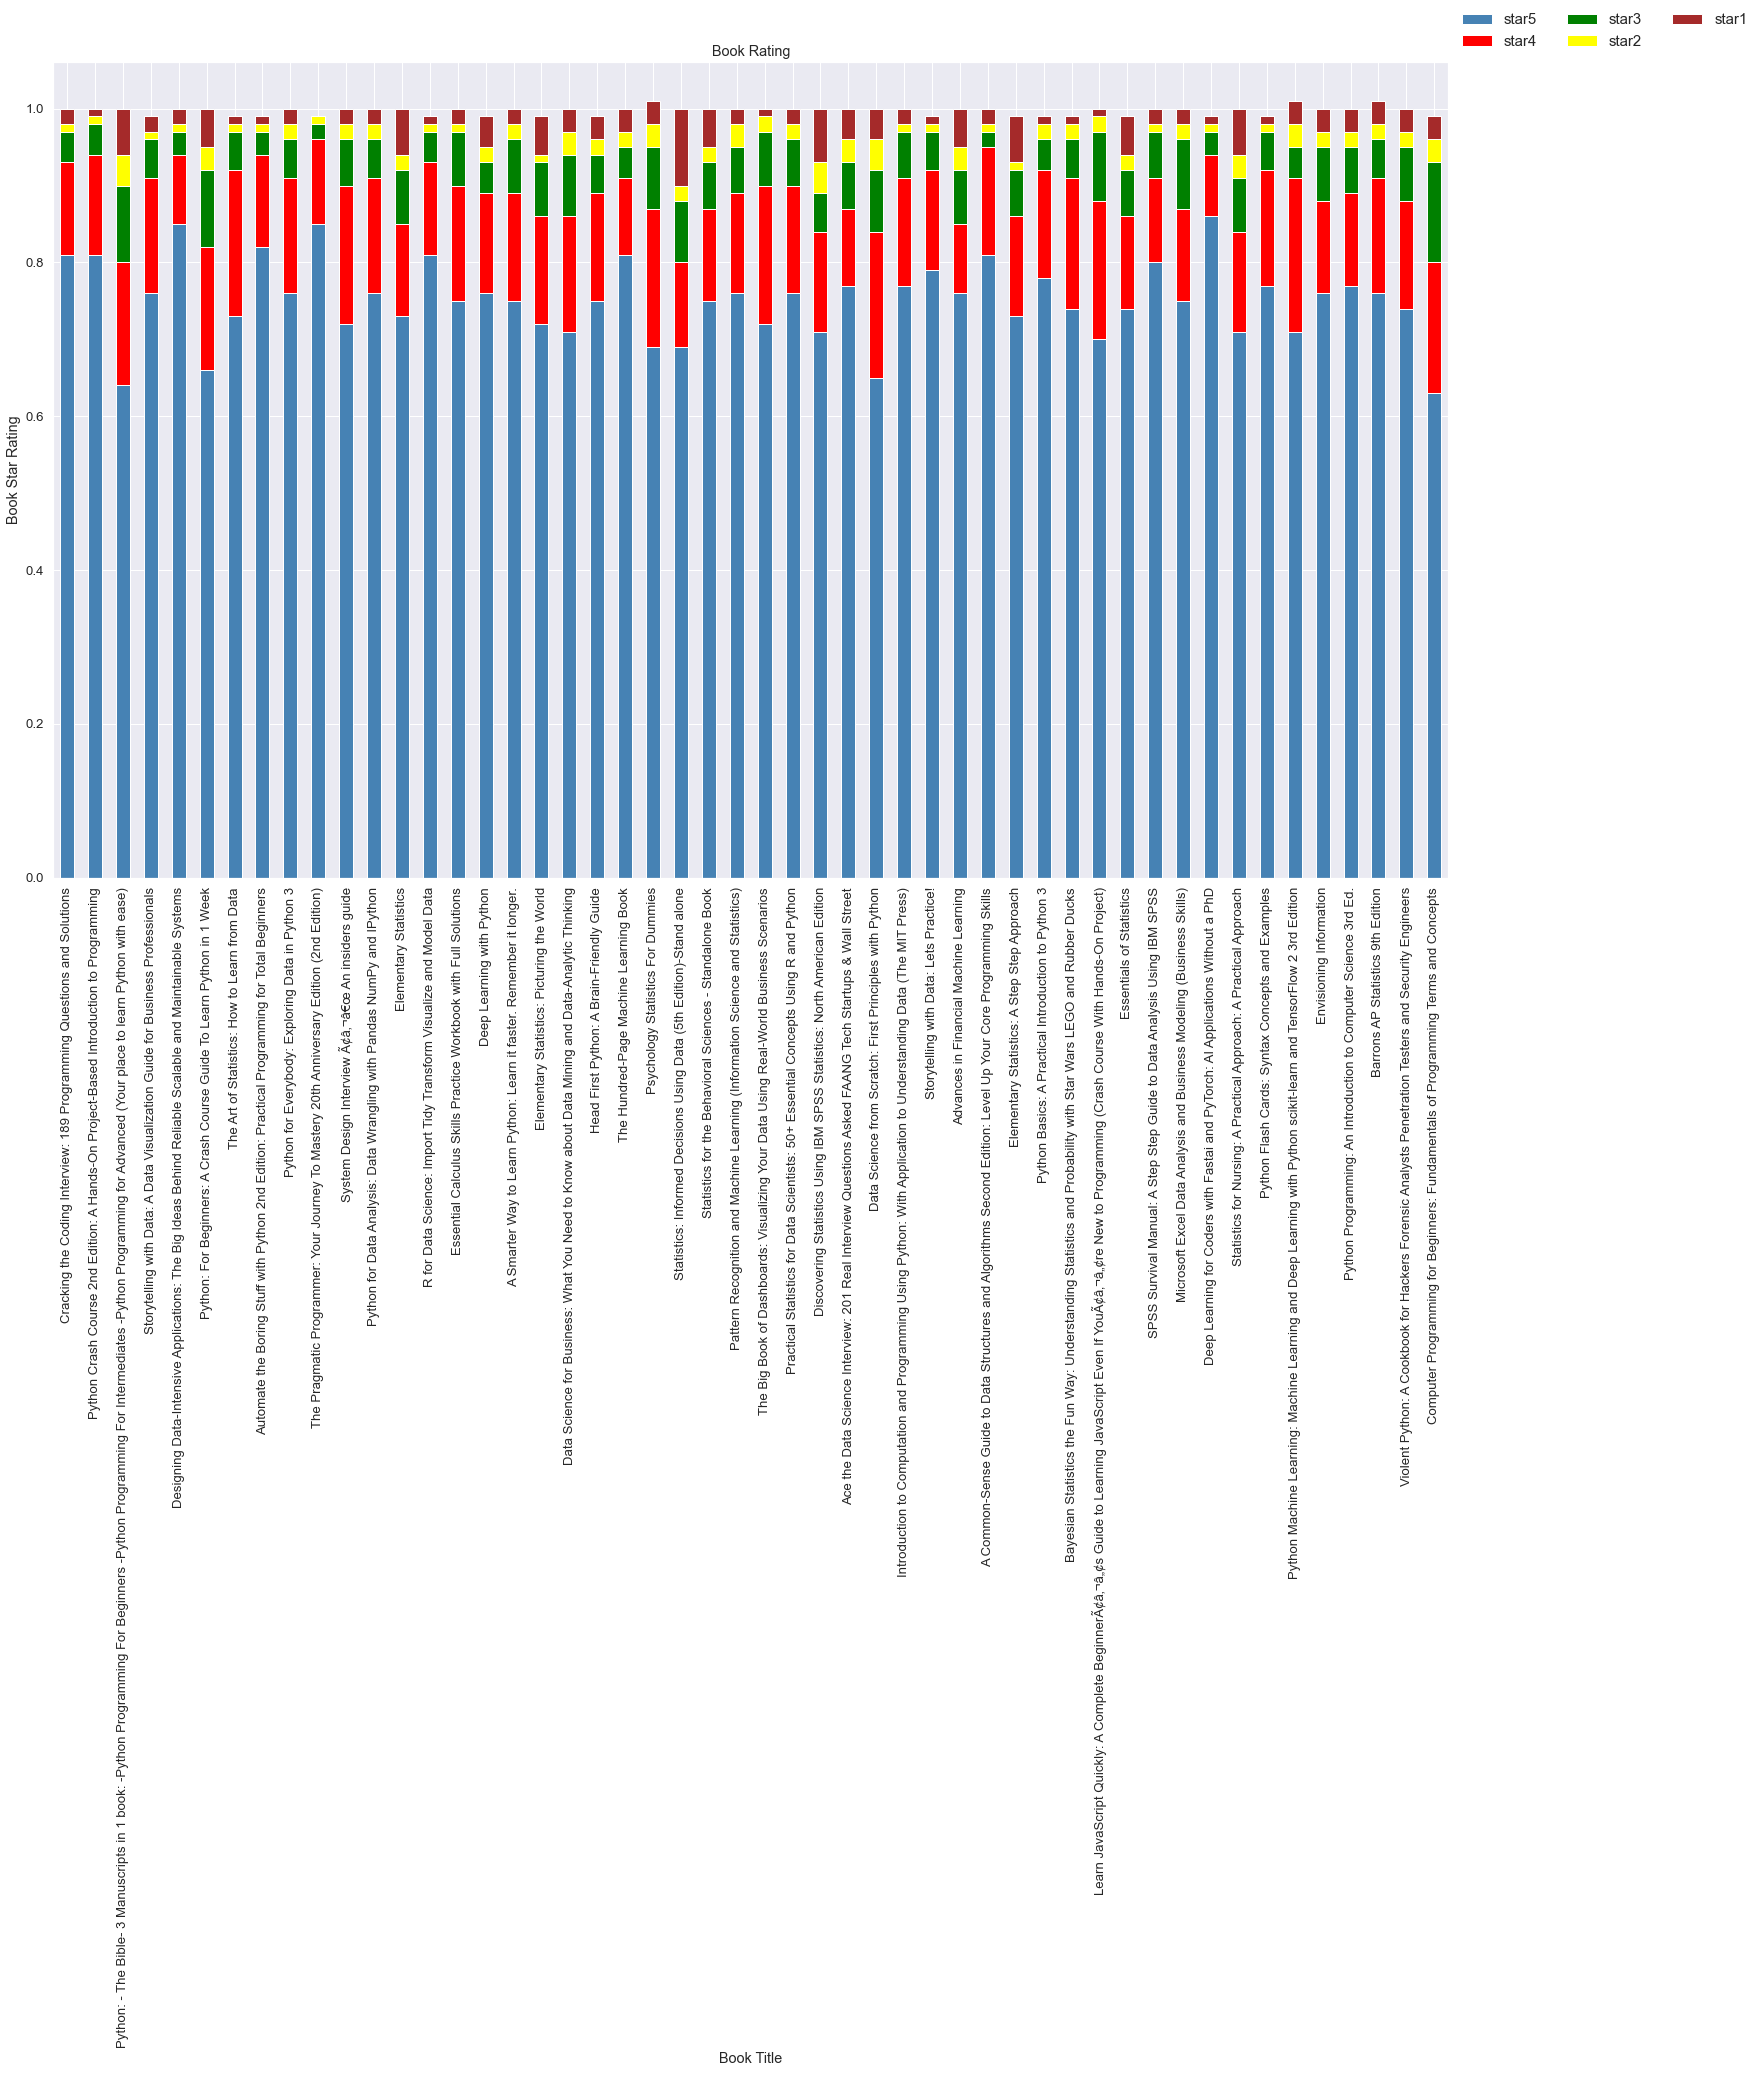

In [18]:
#create stacked bar chart
sns.set(style='white')
sns.set(font_scale = 1.2)

chart1 = data2.set_index('book_title').plot(kind='bar', stacked=True, color=['steelblue', 'red', 'green','yellow','brown'])
sns.move_legend(chart1, "lower left", bbox_to_anchor=(1, 1), ncol=3, title=None, frameon=False, fontsize=15)
chart1.set_title('Book Rating')

chart1.set_xlabel('Book Title')
chart1.set_ylabel('Book Star Rating')

plt.show()

**It observed that non of the top 50 reviewed books have less than 60% five (5) stars rating**

**Q3. The dataset has a language column, which shows the medium of instruction for the book. Which language is common among data practioners/data related book users?**

In [19]:
common_lang =  df_merge1['language'].value_counts()
common_lang

English    697
Spanish      1
Name: language, dtype: int64

Based on the dataset, about 697 of the books were written in English while just only one is written in Spanish, thus makes English the common language among data book users.

**Q4. Who are the most and least populuous author and their respective publisher?**

Assuming the author of book with the highest number of review is considered the most populous author while the book with the least review is the considere the least popular.

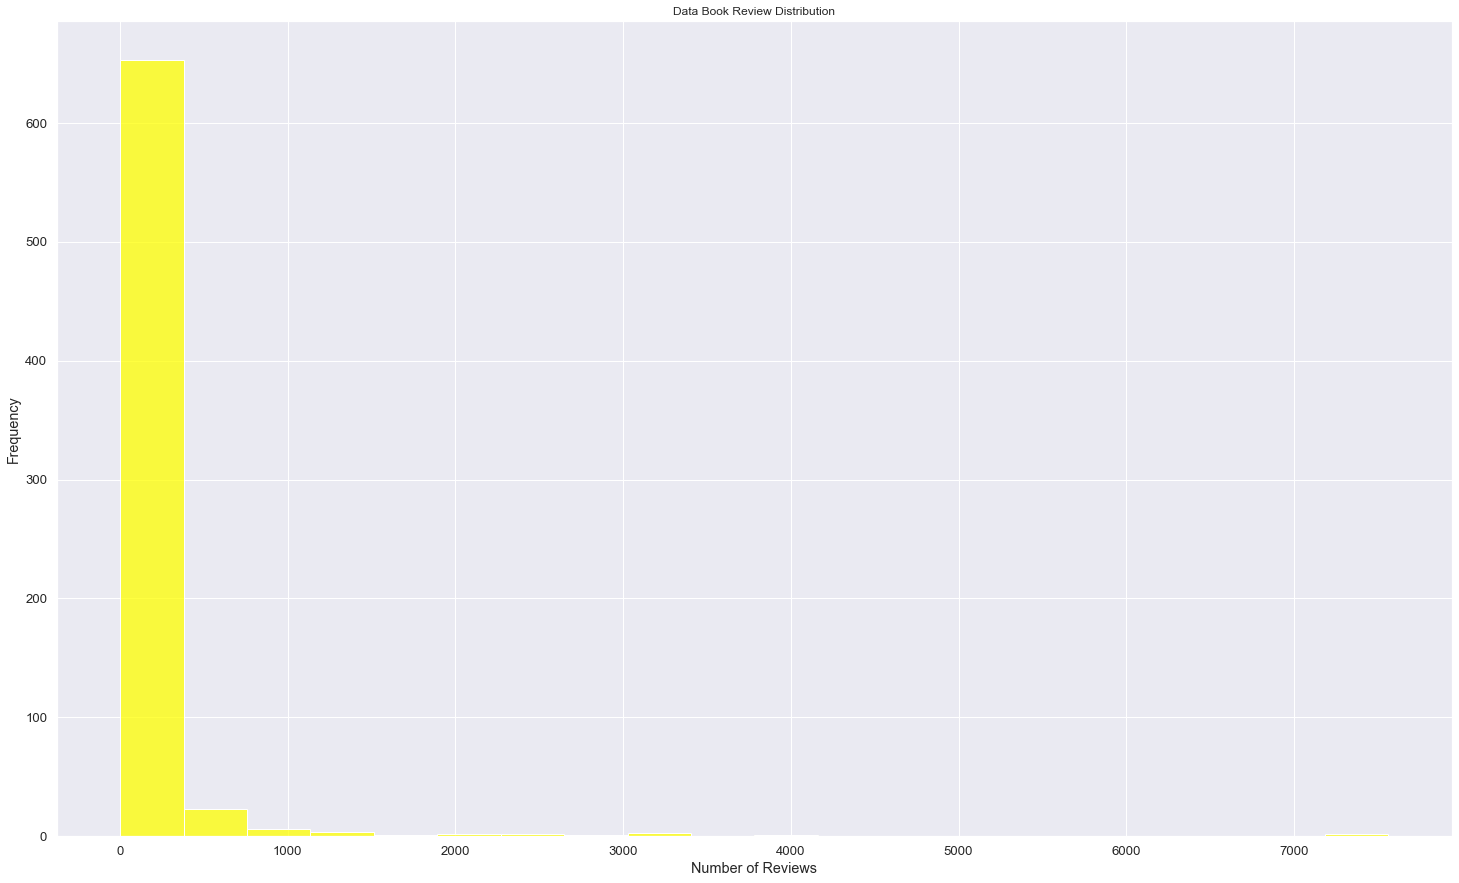

In [20]:
# Review distribution
n_bins = 20
sns.set(font_scale = 1.2)
#plt.title('Data Book Review Distribution')
chart3 = sns.histplot(df_merge1['n_reviews'], bins = n_bins, color='yellow')
sns.set(rc={'figure.figsize':(15,10)})
chart3.set_title('Data Book Review Distribution')

chart3.set_xlabel('Number of Reviews')
chart3.set_ylabel('Frequency')
#plt.xlabel('n_reviews')
#plt.ylabel('frequency')

#df_merge1.n_reviews.plot(kind='hist', bins=n_bins, color='g');
plt.show()

It is worthy of note that very few books has more than 1000 reviews.

In [21]:
#df_merge1['n_reviews'] = df_merge1['n_reviews'].astype('int64')
more_than_1000reviews = df_merge1[df_merge1['n_reviews'] > 1000]
more_than_1000reviews['book_title'].count()

18

There are just only 18 books that have more than 1000 review

In [22]:
# filter the author and publisher of the book with highest review number
more_than_1000reviews[more_than_1000reviews['n_reviews'] == more_than_1000reviews['n_reviews'].max()][['book_author','publisher']]

,book_author,publisher
113,[Gayle Laakmann McDowell],CareerCup; 6th edition (July 1 2015)


Gayle Laakmann McDowell is the most popular author of data science books from the dataset and the publisher of the book is CareerCup; 6th edition (July 1 2015)

In [23]:
data3 = more_than_1000reviews

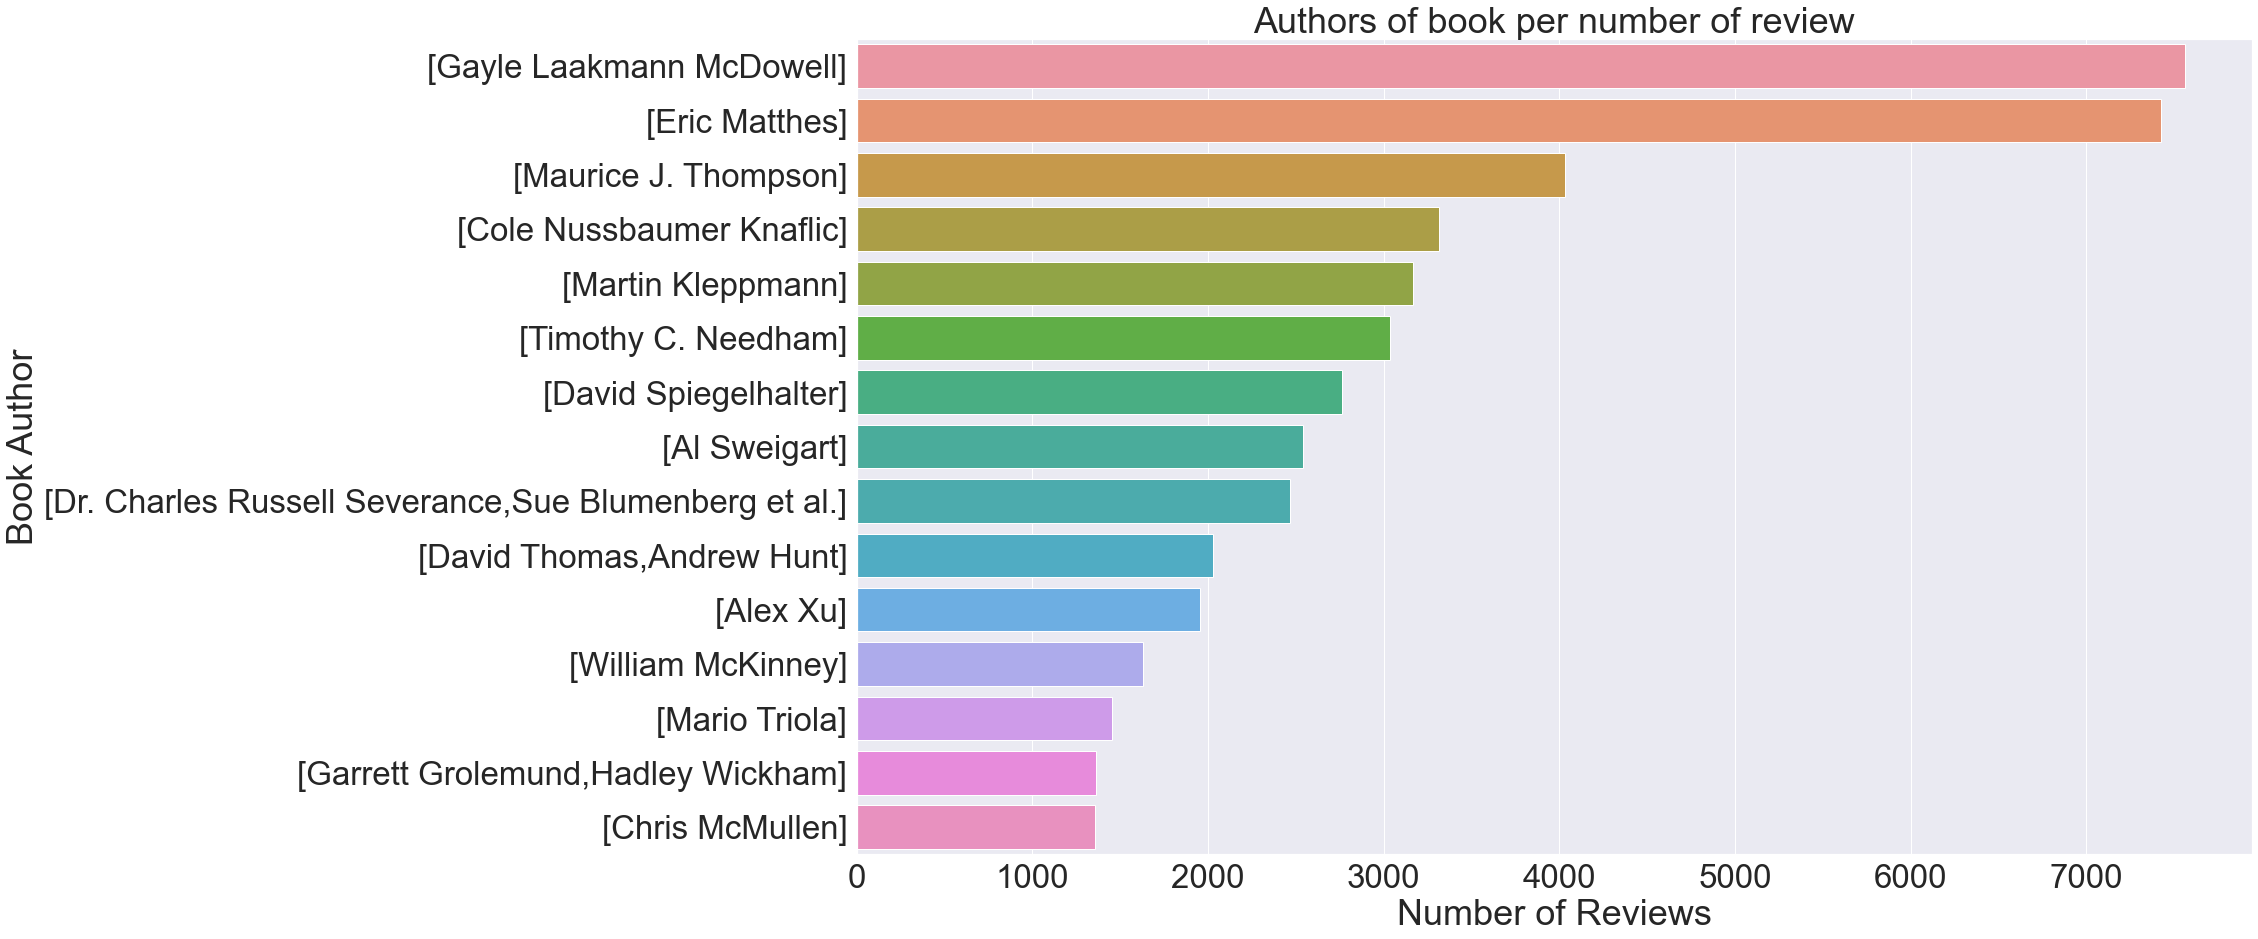

In [24]:
sns.set(rc={'figure.figsize':(25,15)}, font_scale = 3)
chart = sns.barplot(x='n_reviews',y='book_author', data = data1)
#sns.set(rc={'figure.figsize':(15,10)})
chart.set_title('Authors of book per number of review')

chart.set_xlabel('Number of Reviews')
chart.set_ylabel('Book Author')

plt.show()

In [25]:
less_than_1000reviews = df_merge1[df_merge1['n_reviews'] < 1000]
less_than_1000reviews['book_title'].count()

680

There are just only 680 books that have more less than 1000 review

In [26]:
# filter the author and publisher of the book with least review number
bk_least_review =less_than_1000reviews[less_than_1000reviews['n_reviews'] ==
                                       less_than_1000reviews['n_reviews'].min()][['book_author','publisher','n_reviews']]
bk_least_review

print('The number of books with one review:', bk_least_review['book_author'].count())

The number of books with one review: 27


**Q5. Which book (title) and authors are the least cost and costliest of the data book? What is the number of reviews and the five stars raging values of them?**

In [27]:
# filter the cost of least cost and costliest data book 
least_cost = df_merge1['price'].min()
costliest_cost = df_merge1['price'].max()

In [28]:
# filter the book title, author and cost of least cost data science book
author_title_least_cost = df_merge1[df_merge1['price'] == least_cost][['book_title','book_author','price','n_reviews','avg_reviews','star5']]
author_title_least_cost

,book_title,book_author,price,n_reviews,avg_reviews,star5
766,How to Work With Probability and Statistics Gr...,[Robert W. Smith],8.99,3.0,3.2,0.39


**There are only just three reviews for the least costly data science book out of which about 39 % recieved five star rating. There is an average review of 3.2 out of 5**

In [29]:
# filter the book title, author, cost, number of review and five stars rating of most cost data science book  
author_title_most_cost = df_merge1[df_merge1['price'] == costliest_cost][['book_title','book_author','price','n_reviews','avg_reviews','star5']]
author_title_most_cost

,book_title,book_author,price,n_reviews,avg_reviews,star5
764,Using SPSS for Windows and Macintosh (7th Edit...,"[Samuel B. Green,Neil J. Salkind]",279.95,189.0,4.4,0.7


**The costliest data science book has about 189 reviews and these reviews received about 70 % five star rating. The average review of this book is 4.4 out of 5**